<a href="https://colab.research.google.com/github/taejoonlab/BME603-Proteomics/blob/main/ms1ms2/GenerateSpectrum.ipynb" target="_blank">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab">
</a>

# Generate a theoretical spectrum.

In [2]:
# Read the masses of amino acids from AminoAcidMasses.json
aa_list = {    
    "A": { "avg": 71.0788, "mono": 71.03711 },
    "C": { "avg": 103.1388, "mono": 103.00919 },
    "D": { "avg": 115.0886, "mono": 115.02694 },
    "E": { "avg": 129.1155, "mono": 129.04259 },
    "F": { "avg": 147.1766, "mono": 147.06841 },
    "G": { "avg": 57.0519, "mono": 57.02146 },
    "H": { "avg": 137.1411, "mono": 137.05891 },
    "I": { "avg": 113.1594, "mono": 113.08406 },
    "K": { "avg": 128.1741, "mono": 128.09496 },
    "L": { "avg": 113.1594, "mono": 113.08406 },
    "M": { "avg": 131.1926, "mono": 131.04049 },
    "N": { "avg": 114.1038, "mono": 114.04293 },
    "P": { "avg": 97.1167, "mono": 97.05276 },
    "Q": { "avg": 128.1307, "mono": 128.05858 },
    "R": { "avg": 156.1875, "mono": 156.10111 },
    "S": { "avg": 87.0782, "mono": 87.03203 },
    "T": { "avg": 101.1051, "mono": 101.04768 },
    "V": { "avg": 99.1326, "mono": 99.06841 },
    "W": { "avg": 186.2132, "mono": 186.07931 },
    "Y": { "avg": 163.176, "mono": 163.06333 }
}

# Check the masses of each amino acids    
import pprint 
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(aa_list)

{   'A': {'avg': 71.0788, 'mono': 71.03711},
    'C': {'avg': 103.1388, 'mono': 103.00919},
    'D': {'avg': 115.0886, 'mono': 115.02694},
    'E': {'avg': 129.1155, 'mono': 129.04259},
    'F': {'avg': 147.1766, 'mono': 147.06841},
    'G': {'avg': 57.0519, 'mono': 57.02146},
    'H': {'avg': 137.1411, 'mono': 137.05891},
    'I': {'avg': 113.1594, 'mono': 113.08406},
    'K': {'avg': 128.1741, 'mono': 128.09496},
    'L': {'avg': 113.1594, 'mono': 113.08406},
    'M': {'avg': 131.1926, 'mono': 131.04049},
    'N': {'avg': 114.1038, 'mono': 114.04293},
    'P': {'avg': 97.1167, 'mono': 97.05276},
    'Q': {'avg': 128.1307, 'mono': 128.05858},
    'R': {'avg': 156.1875, 'mono': 156.10111},
    'S': {'avg': 87.0782, 'mono': 87.03203},
    'T': {'avg': 101.1051, 'mono': 101.04768},
    'V': {'avg': 99.1326, 'mono': 99.06841},
    'W': {'avg': 186.2132, 'mono': 186.07931},
    'Y': {'avg': 163.176, 'mono': 163.06333}}


In [3]:
def generate_spectra(tmp_pep, type='avg'):
    rv = {'b': [], 'y': [], 'precursor':0.0, 'b_label':[], 'y_label':[]}
    mass_list = [aa_list[x][type] for x in tmp_pep]
    print("AA masses: ",tmp_pep, mass_list)
    y_mass = sum(mass_list)
    rv['precursor'] = y_mass
    b_mass = 1
    len_pep = len(tmp_pep)
    for i in range(0, len_pep-1):
        tmp_mass = mass_list[i]
        b_mass = b_mass + tmp_mass
        y_mass = y_mass - tmp_mass
        rv['b'].append(b_mass)
        rv['b_label'].append(tmp_pep[:i+1])
        rv['y'].append(y_mass)
        rv['y_label'].append(tmp_pep[-1*(len_pep-i-1):])
    return rv
    
 
query_peptide = 'DAR'
#query_peptide = 'DLRSWTAADTAAQISQ'
query_spectra = generate_spectra(query_peptide, type='avg')

# Check the masses of each amino acids    
import pprint 
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(query_spectra)

AA masses:  DAR [115.0886, 71.0788, 156.1875]
{   'b': [116.0886, 187.1674],
    'b_label': ['D', 'DA'],
    'precursor': 342.3549,
    'y': [227.2663, 156.1875],
    'y_label': ['AR', 'R']}


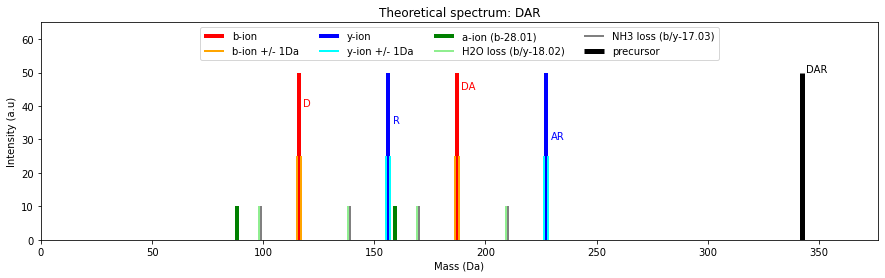

In [4]:
import matplotlib.pyplot as plt

intensity_b_y = 50
intensity_a = 10

fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1,1,1)

# b-ions
ax1.vlines(query_spectra['b'], ymin=0, ymax=intensity_b_y, edgecolor='red', linewidth=4, label='b-ion')
ax1.vlines([x-1 for x in query_spectra['b']], ymin=0, ymax=intensity_b_y*0.5, edgecolor='orange', linewidth=2, label='b-ion +/- 1Da')
ax1.vlines([x+1 for x in query_spectra['b']], ymin=0, ymax=intensity_b_y*0.5, edgecolor='orange', linewidth=2)
for i in range(0, len(query_spectra['b'])):
    ax1.text(query_spectra['b'][i]+2, intensity_b_y-10+(i%2)*5, query_spectra['b_label'][i], color='red')

# y-ions
ax1.vlines(query_spectra['y'], ymin=0, ymax=intensity_b_y, edgecolor='blue', linewidth=4, label='y-ion')
ax1.vlines([x-1 for x in query_spectra['y']], ymin=0, ymax=intensity_b_y*0.5, edgecolor='cyan', linewidth=2, label='y-ion +/- 1Da')
ax1.vlines([x+1 for x in query_spectra['y']], ymin=0, ymax=intensity_b_y*0.5, edgecolor='cyan', linewidth=2)
for i in range(0, len(query_spectra['y'])):
    ax1.text(query_spectra['y'][i]+2, intensity_b_y-20+(i%2)*5, query_spectra['y_label'][i], color='blue')

# a-ions : loss of CO (MW=28.01)
mass_CO = 28.01
ax1.vlines([x-mass_CO for x in query_spectra['b']], ymin=0, ymax=intensity_a, edgecolor='green', linewidth=4, label=('a-ion (b-%.2f)' % mass_CO))

# loss of H2O (MW=18.015)
mass_H2O = 18.015
ax1.vlines([x-mass_H2O for x in query_spectra['b']], ymin=0, ymax=intensity_a, edgecolor='lightgreen', linewidth=2, label=('H2O loss (b/y-%.2f)' % mass_H2O))
ax1.vlines([x-mass_H2O for x in query_spectra['y']], ymin=0, ymax=intensity_a, edgecolor='lightgreen', linewidth=2)

# loss of NH3 (MW=17.031)
mass_NH3 = 17.031
ax1.vlines([x-mass_NH3 for x in query_spectra['b']], ymin=0, ymax=intensity_a, edgecolor='grey', linewidth=2, label=('NH3 loss (b/y-%.2f)' % mass_NH3))
ax1.vlines([x-mass_NH3 for x in query_spectra['y']], ymin=0, ymax=intensity_a, edgecolor='grey', linewidth=2)

# Precursor
ax1.vlines(query_spectra['precursor'], ymin=0, ymax=intensity_b_y, edgecolor='black', linewidth=5, label='precursor')
ax1.text(query_spectra['precursor']+2, intensity_b_y, query_peptide)

ax1.set_xlim(0, query_spectra['precursor']*1.1)
ax1.set_ylim(0, 65)
ax1.set_xlabel('Mass (Da)')
ax1.set_ylabel('Intensity (a.u)')
ax1.legend(ncol=4, loc='upper center')
ax1.set_title('Theoretical spectrum: %s' % query_peptide)
plt.show()